# Building a Spam Classifier with Naive Bayes and Scikit-Learn Pipelines 📧

This notebook walks through the process of building a machine learning model to classify SMS messages as either "spam" or "ham" (not spam). This is a classic Natural Language Processing (NLP) task.

We will use the **Multinomial Naive Bayes** algorithm, which is a probabilistic classifier that works particularly well for text classification. It's based on Bayes' Theorem and makes a "naive" assumption that the features (in this case, the words in the message) are independent of each other.

A key challenge in NLP is that machine learning models work with numbers, not raw text. Therefore, we must first convert the text messages into a numerical format, a process called **text vectorization**.

---

## 1. Exploring the SMS Spam Dataset

First, we'll load the dataset and take a look at its structure. It contains two columns: `Category` (our target) and `Message` (our feature).


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's check the distribution of the two classes.

In [2]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

The dataset is **imbalanced**, with significantly more "ham" messages than "spam." This is common in real-world scenarios like fraud detection or medical screening.

Finally, we split our data into training (80%) and testing (20%) sets.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=5)

## 2. Converting Text to Numbers: The Bag-of-Words Model

To convert our text messages into a numerical format, we'll use the **Bag-of-Words (BoW)** model. The idea is simple:
1.  **Create a Vocabulary:** Build a list of every unique word that appears in the training text.
2.  **Count Occurrences:** For each message, count how many times each word from the vocabulary appears.

This process creates a numerical matrix where each row represents a message and each column represents a word, with the cell values being the word counts. `Scikit-learn`'s `CountVectorizer` is the perfect tool for this.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

## 3. Training the Multinomial Naive Bayes Model

Now that our text is converted into numerical vectors, we can train our `MultinomialNB` classifier on the training data.


In [5]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## 4. Evaluating Performance

Let's evaluate our model's performance on the unseen test data using a classification report and a confusion matrix.


In [6]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



The model performs exceptionally well, with an accuracy of **99%**. The precision and recall for both classes are also very high. The confusion matrix gives us a visual breakdown of the model's predictions.


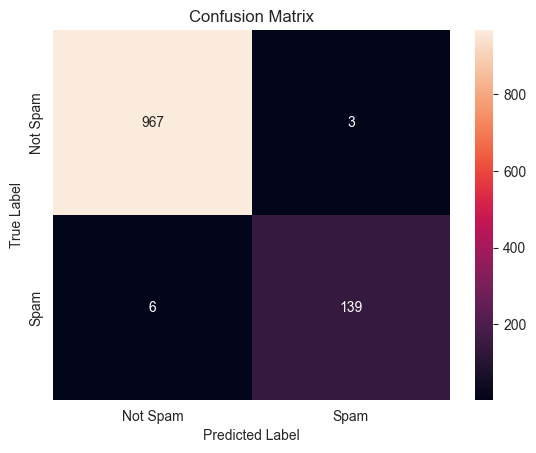

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The matrix shows:
* **True Negatives (Top-Left):** 967 messages were correctly classified as "ham".
* **False Positives (Top-Right):** 3 "ham" messages were incorrectly classified as "spam".
* **False Negatives (Bottom-Left):** 6 "spam" messages were incorrectly classified as "ham".
* **True Positives (Bottom-Right):** 139 messages were correctly classified as "spam".


## 5. A More Efficient Workflow: Using Scikit-Learn Pipelines

The manual, two-step process of vectorizing the text and then training the model works, but it can be error-prone. You must always remember to apply the exact same vectorization step to your test data and any new data you want to predict on.

A safer and more efficient approach is to use a `Pipeline`. A pipeline chains together multiple processing steps (like our vectorizer and classifier) into a single object that acts like one model.


In [8]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

pipe.fit(X_train, y_train)
y_pred_pipe = pipe.predict(X_test)
report_pipe = classification_report(y_test, y_pred_pipe)
print(report_pipe)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



As you can see, the pipeline produces the exact same excellent results but with a much cleaner and more robust workflow. When we call `pipe.predict()`, it automatically handles the vectorization of the input text before passing it to the classifier.